In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
# from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape

from utils import load_weights, Box, yolo_net_out_to_car_boxes, draw_box, yolo_net_out_to_person_boxes

In [13]:
keras.backend.set_image_dim_ordering('th')

In [14]:
model = Sequential()
model.add(Convolution2D(16, 3, 3,input_shape=(3,448,448),border_mode='same',subsample=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(64,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(128,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(256,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(512,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1470))

In [15]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_10 (Convolution2D) (None, 16, 448, 448)  448         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
leakyrelu_11 (LeakyReLU)         (None, 16, 448, 448)  0           convolution2d_10[0][0]           
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 16, 224, 224)  0           leakyrelu_11[0][0]               
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 32, 224, 224)  4640        maxpooling2d_7[0][0]             
___________________________________________________________________________________________

In [16]:
load_weights(model,'./yolo-tiny.weights')

In [23]:
imagePath = './test_images_pedestrians/pedestrian1.jpg'
image = plt.imread(imagePath)
# image_crop = image[300:650,500:,:]
resized = cv2.resize(image,(448,448))

In [24]:
batch = np.transpose(resized,(2,0,1))
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
out = model.predict(batch)

In [25]:
boxes = dict()
boxes['car_boxes'] = yolo_net_out_to_car_boxes(out[0], threshold = 0.17)
boxes['person_boxes'] = yolo_net_out_to_person_boxes(out[0], threshold = 0.17)

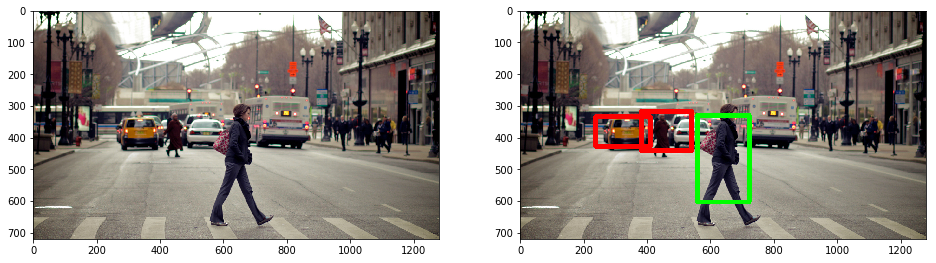

In [26]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.imshow(image)
ax2.imshow(draw_box(boxes,plt.imread(imagePath),[[0, 1280], [0, 720]]))

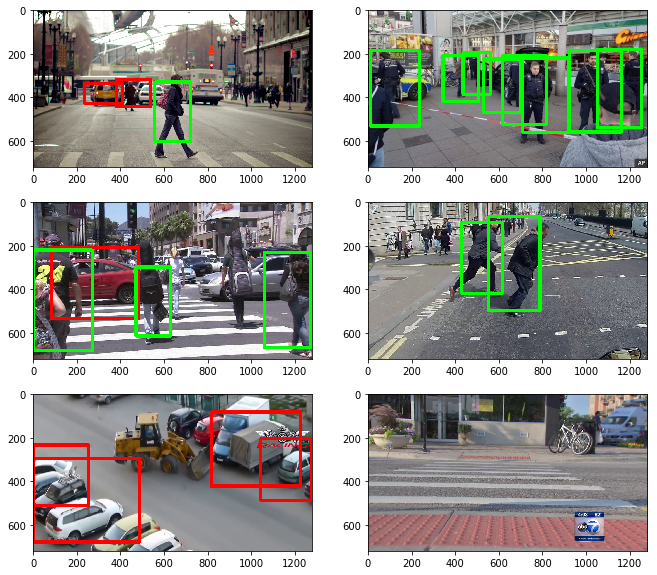

In [28]:
images = [plt.imread(file) for file in glob.glob('./test_images_pedestrians/*.jpg')]
batch = np.array([np.transpose(cv2.resize(image,(448,448)),(2,0,1)) 
                  for image in images])
batch = 2*(batch/255.) - 1
out = model.predict(batch)
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(11,10))
for i,ax in zip(range(len(batch)),[ax1,ax2,ax3,ax4,ax5,ax6]):
    boxes['car_boxes'] = yolo_net_out_to_car_boxes(out[i], threshold = 0.17)
    boxes['person_boxes'] = yolo_net_out_to_person_boxes(out[i], threshold = 0.17)
    ax.imshow(draw_box(boxes,images[i],[[0,1280],[0,720]]))